# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # ИСТОЧНИК : лекция №4 , http://localhost:8888/files/iad-intro-ds/2022/lectures/lecture04-linregr.pdf
        return np.square(X.dot(w)-y).mean() 
        
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return 2*np.dot(X.T,(X.dot(w)-y))/y.size

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    weights = [w_init]
    for i in range(n_iterations):
        weights.append(weights[-1] - lr*loss.calc_grad(X, y, weights[-1]))
    return weights

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)



(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss, lr):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(20, 10))
    
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])
    
    if lr != "":
        plt.title(f"Параметр: {lr}")

    plt.show()
    

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

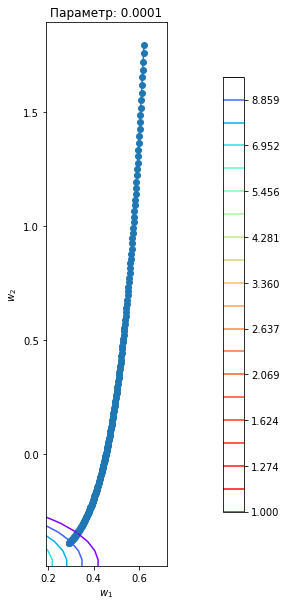

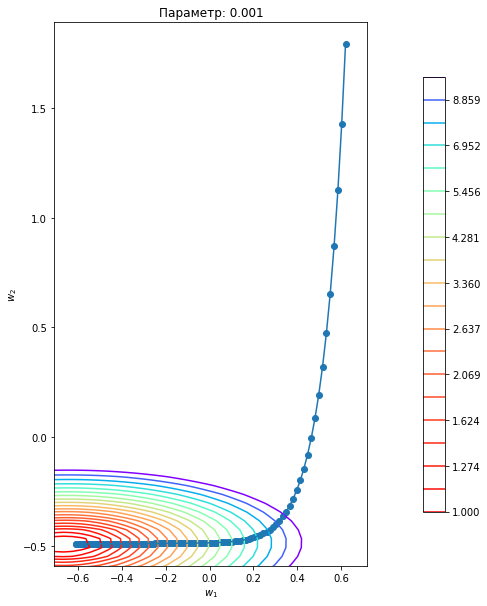

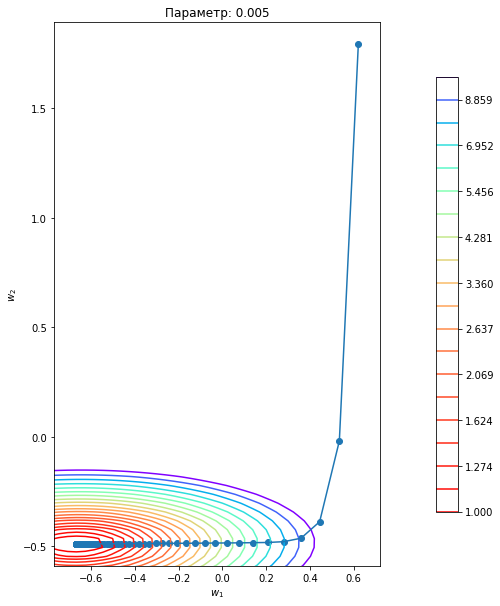

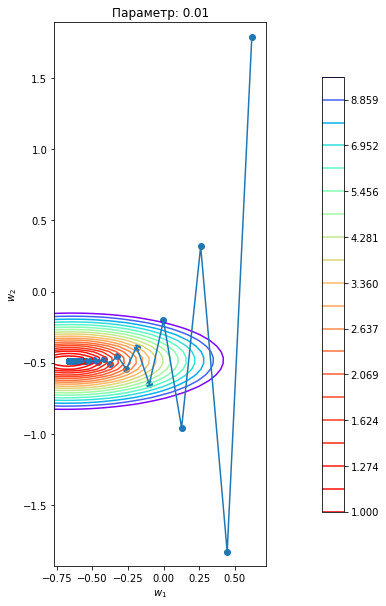

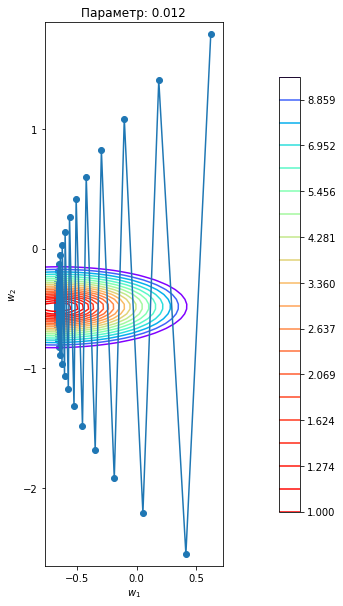

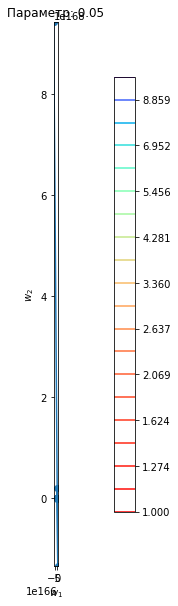

In [9]:
for lr in [0.0001, 0.001, 0.005, 0.01, 0.012, 0.05]: 
    w_list = gradient_descent(w_init, X, y, loss, lr, 200)
    plot_gd(w_list, X, y, loss, lr)

    ВЫВОДЫ
***
Если шаг слишком маленький (например, 0.0001), то регрессия идет слишком медленно и неуверенно; чтобы дойти до точки минимальной ошибки, ей потребуется более 1000 шагов, что неоптимально. При увеличении шага регрессия ведет себя увереннее, быстрее доходит до оптимального состояния. Со временем она начинает "прыгать", двигаясь зигзагообразно (перпендикулярно линиям уровня), но все еще уменьшая эти отклонения при подходе к оптимуму, который она находит. 

Но если перескочить некоторую золотую середину и сделать шаг слишком большим, то регрессия начинает скакать слишком сильно и перепрыгивать возможные оптимальные точки

В этом примере шаг 0.01 кажется лучшим выбором
***

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [10]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    weights = [w_init]
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        
        weights.append(weights[-1] - lr*loss.calc_grad(X[batch_indices], y[batch_indices], weights[-1]))
    return weights

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

        ВЫВОДЫ
***
Если шаг слишком маленький (напр, 0.0001), то вне зависимости от batch_size градиент будет идти очень медленно и никуда не дойдет. Влияние шага такое же, как и в обычном градиентном спуске: чем он больше, тем увереннее идет спуск, пока не начинает "скакать" слишком сильно даже вблизи оптимума.

При маленьких batch_size спуск доходит до области вокруг оптимума, но там не может на него спокойно указать, так как слишком маленькая выборка, и его сильно штормит. Начиная где-то с batch_size, равного половине всего датасета, траектория становится более гладкой и более менеее ясно приводит к оптимуму
***

LR: 0.0001, batch size: 100


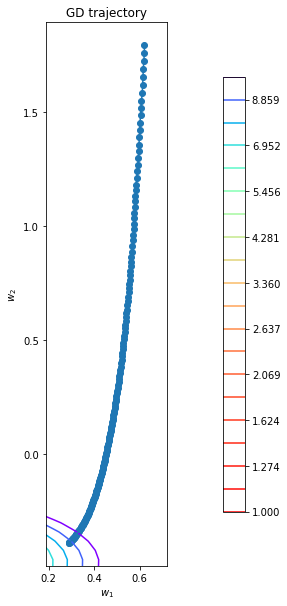

LR:0.001, batch size: 10


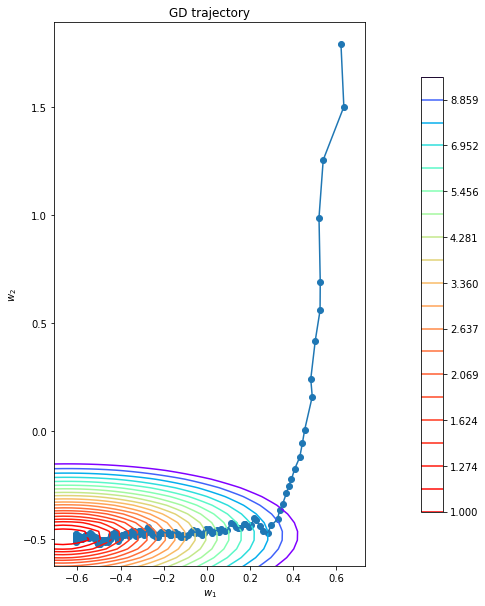

LR:0.001, batch size: 50


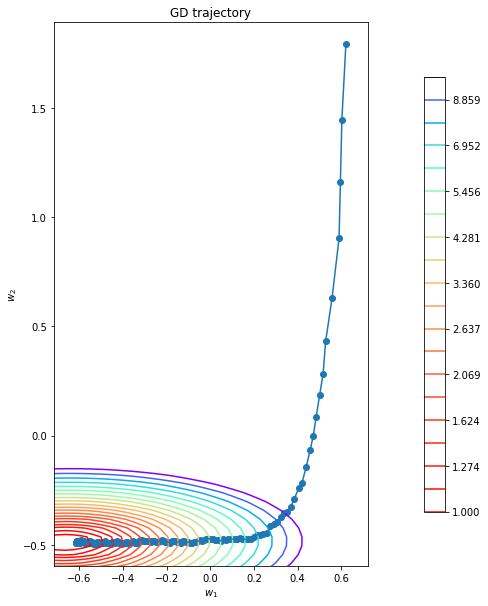

LR:0.001, batch size: 100


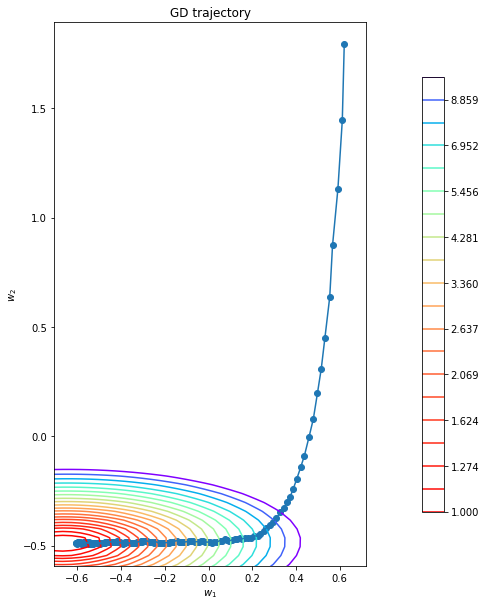

LR:0.001, batch size: 150


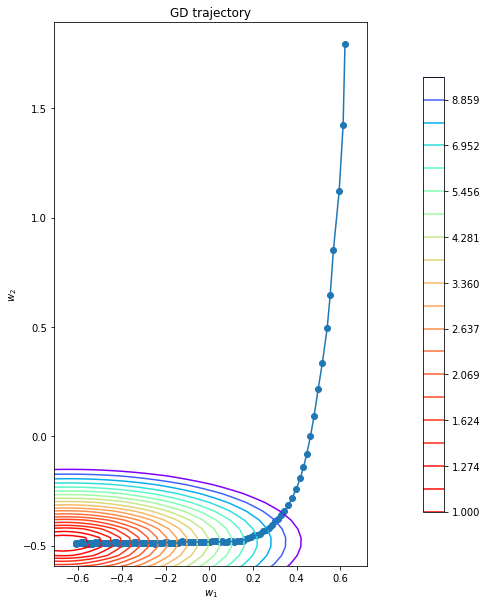

LR:0.001, batch size: 200


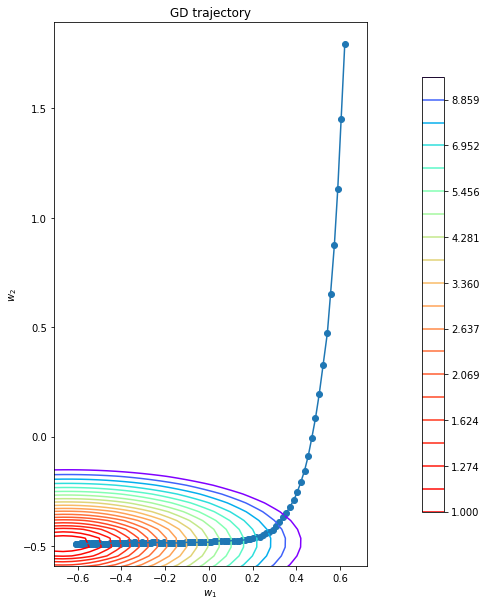

LR:0.005, batch size: 10


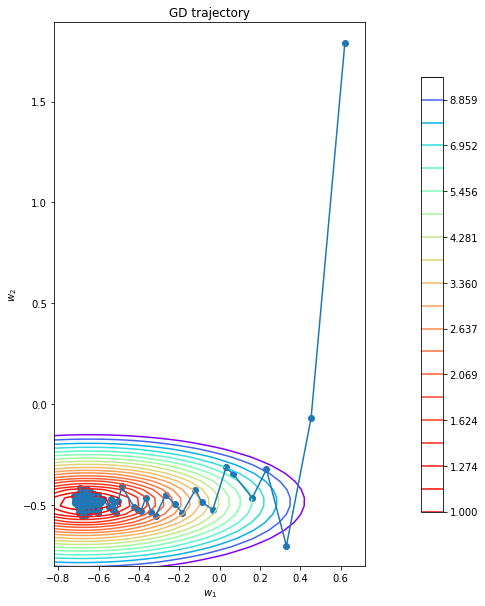

LR:0.005, batch size: 50


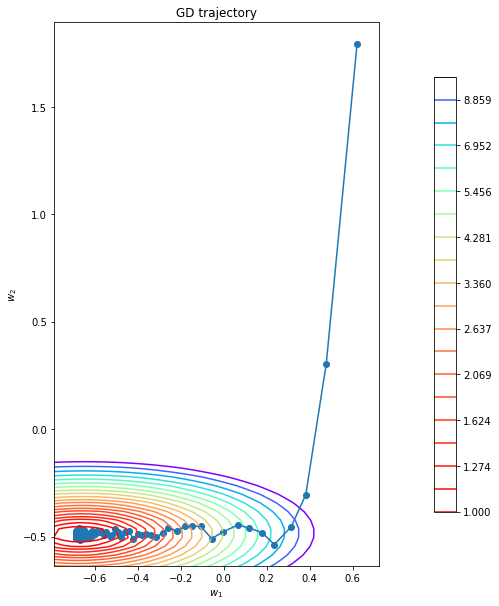

LR:0.005, batch size: 100


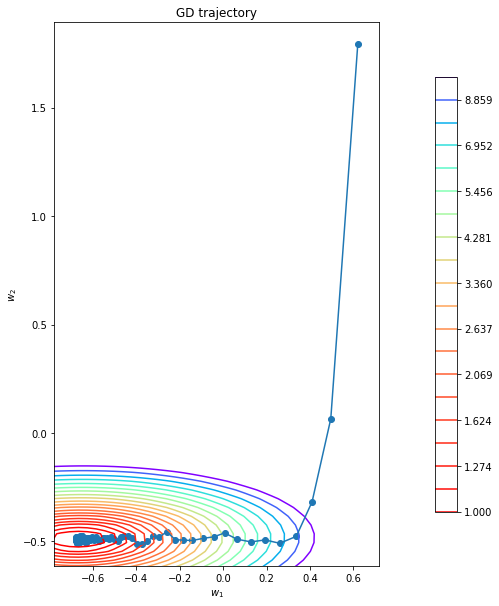

LR:0.005, batch size: 150


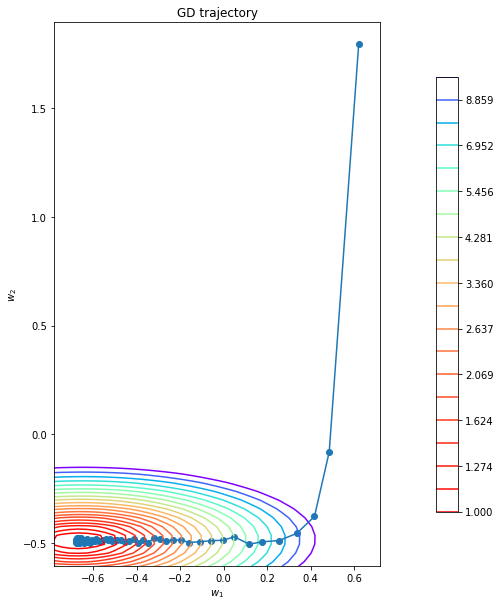

LR:0.005, batch size: 200


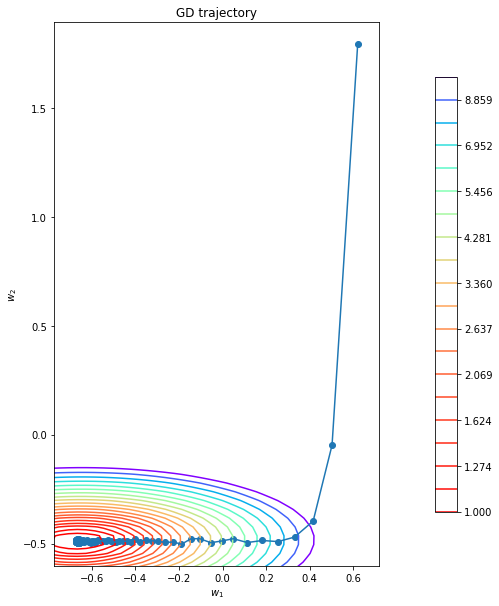

LR:0.01, batch size: 10


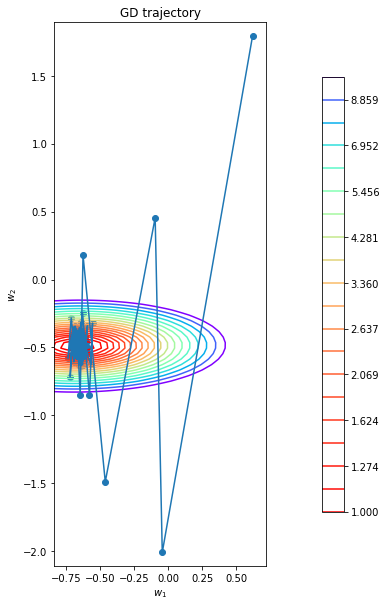

LR:0.01, batch size: 50


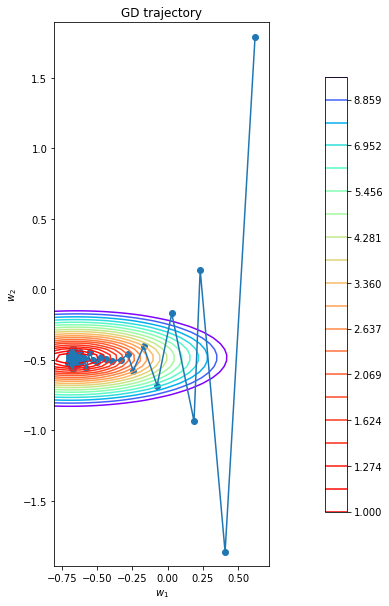

LR:0.01, batch size: 100


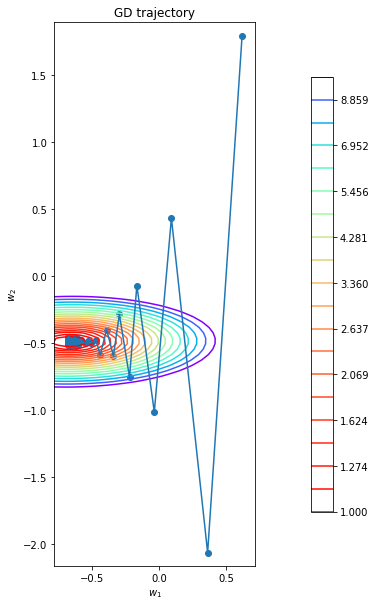

LR:0.01, batch size: 150


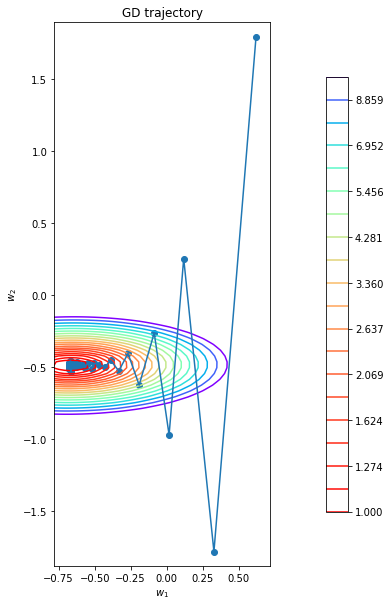

LR:0.01, batch size: 200


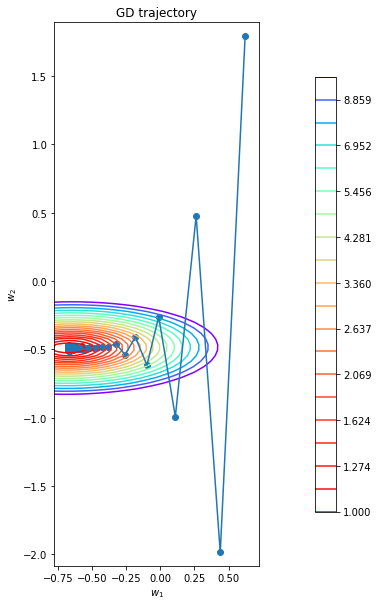

In [11]:
print("LR: 0.0001, batch size: 100")
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.0001, 100, 200)
plot_gd(w_list, X, y, loss, "")
for lr in [0.001, 0.005, 0.01]:
    for batch_size in [10, 50, 100, 150, 200]:
        print(f"LR:{lr}, batch size: {batch_size}")
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, 200)
        plot_gd(w_list, X, y, loss, "")

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [13]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    weights = [w_init]
    for i in range(n_iterations):
        
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        weights.append(weights[-1] - lr*np.power(1/(1+i), p)*loss.calc_grad(X[batch_indices], y[batch_indices], weights[-1]))
    return weights

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

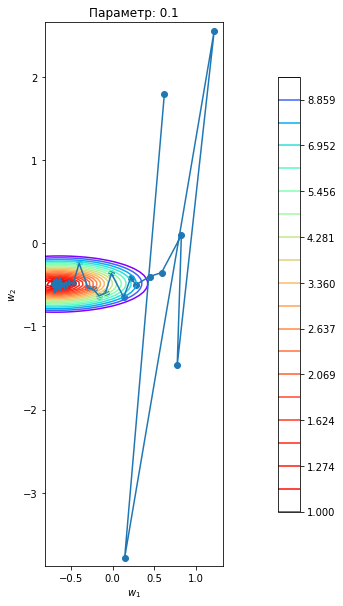

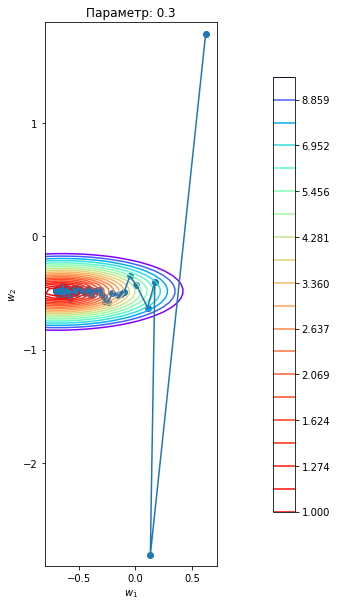

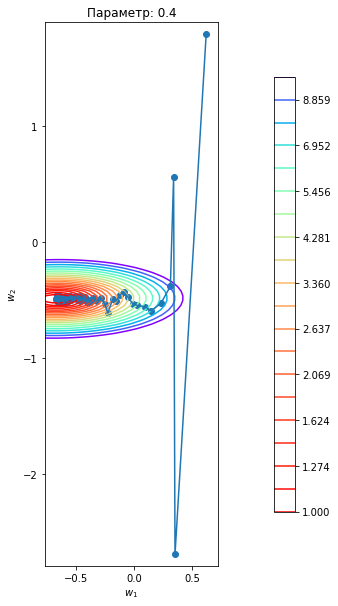

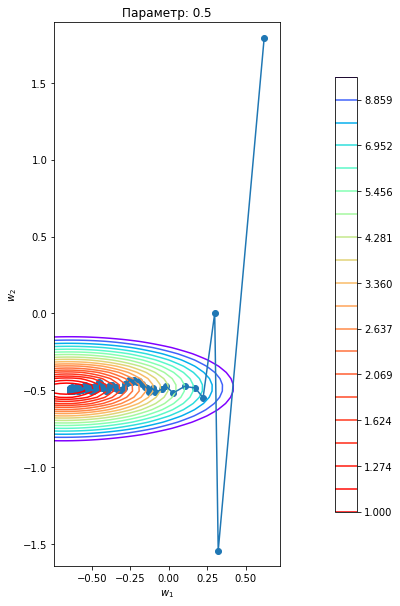

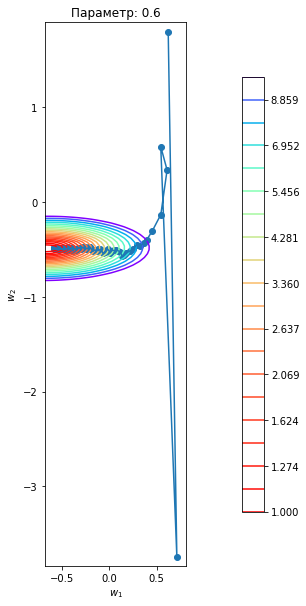

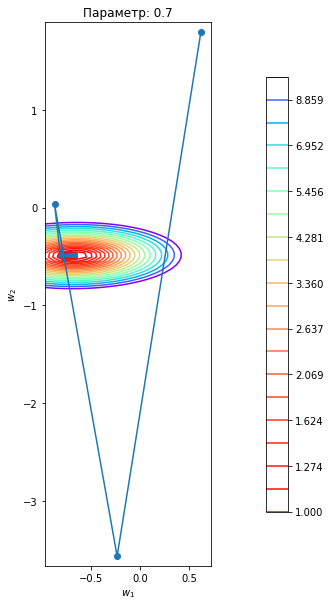

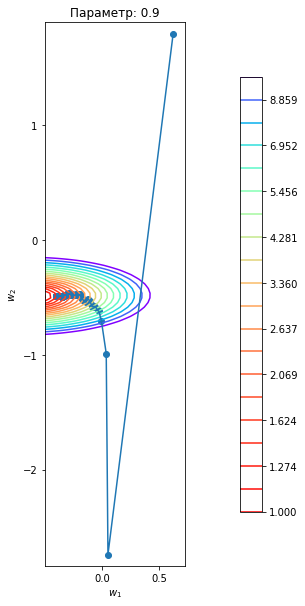

In [14]:
for p in [0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9]:
    w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 200)
    plot_gd(w_list, X, y, loss, lr=p)

        ВЫВОДЫ
   ***
Увеличивая р, шаг уменьшается все быстрее. При наибольшем Р из тех, которые я подставляла, к концу он уменьшился настолько, что даже не дошел до оптимума в итоге. Если же параметр слишком маленький, то шаг уменьшается плохо и продолжает сильно скакать, уже находясь вблизи оптимума, что плохо.

В этом случае хороший параметр ~0.6
***

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [12]:
np.random.seed(1337)
w_init  = np.random.uniform(-2, 2, (n_features))
n_iterations = 200
lr = 0.001
batch_size = 10

weight_gd = w_init
losses_gd = [loss.calc_loss(X, y, weight_gd)]

weight_sgd = w_init
losses_sgd = [loss.calc_loss(X, y, weight_sgd)]

for i in range(n_iterations):
    weight_gd -= lr*loss.calc_grad(X, y, weight_gd)
    losses_gd.append(loss.calc_loss(X, y, weight_gd))
    
    sample_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
    weight_sgd -= lr*loss.calc_grad(X[sample_indices], y[sample_indices], weight_sgd)
#     losses_sgd.append(loss.calc_loss(X[sample_indices], y[sample_indices], weight_sgd))
    losses_sgd.append(loss.calc_loss(X, y, weight_sgd))

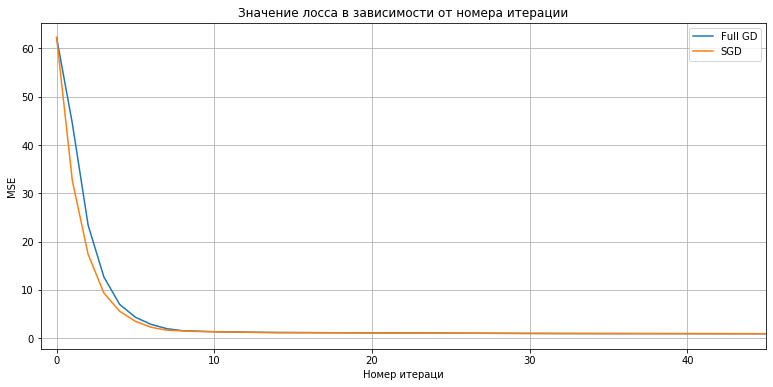

In [13]:
plt.figure(figsize=(13, 6))

plt.plot(range(n_iterations+1), losses_gd, label='Full GD')
plt.plot(range(n_iterations+1), losses_sgd, label='SGD')

plt.title('Значение лосса в зависимости от номера итерации')
plt.xlim((-1, 45))
plt.legend()
plt.xlabel('Номер итераци')
plt.ylabel('MSE')
plt.grid()
plt.show()

        ВЫВОДЫ
***
Да, преимущество SGD видно: на первых ~5-10 итерациях он показывает бОльшую эффективность, уменьшая MSE быстрее full GD. На следующих итерациях MSE уже почти равны и приближаются к нулю.

***

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [14]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        np.random.seed(1337)
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_init = np.random.normal(size=(X.shape[1], ))
        self.w = gradient_descent(w_init, X, y, self.loss, self.lr)[-1]
#         n_iterations - ???
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return np.dot(X, self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [15]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [16]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [17]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
state = 6

In [19]:
# Заполняем пропуски (числа - по тренировочной выборке)
#   источник: семинар 6 по линейной регрессии : http://localhost:8889/notebooks/iad-intro-ds/2022/seminars/sem06_linreg/sem06_linreg_unsolved.ipynb
cat_features_mask = (X_raw.dtypes == "object").values
X_train1, X_test1, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=state)
# для вещественнозначных признаков заполним пропуски средними по тренировочной выборке
X_train1_real = X_train1[X_train1.columns[~cat_features_mask]]# тренировочные вещественные столбцы
X_real = X_raw[X_raw.columns[~cat_features_mask]] # все вещественные столбцы
mis_replacer = SimpleImputer(strategy="mean")
mis_replacer.fit(X_train1_real) # обучаем на тренировочной
X_no_mis_real = pd.DataFrame(data=mis_replacer.transform(X_real), columns=X_real.columns) # заполняем средними всю выборку
# для категориальных - пустыми строками
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)

X_no_mis.isnull().any().any()

False

In [20]:
# Закодируйте категориальные переменные
X_dum = pd.get_dummies(X_no_mis, drop_first=True)

In [21]:
# Разделите датасет на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.3, random_state=state)

In [22]:
# # Нормализуйте числовые признаки
# normalizer = MinMaxScaler()
# X_real_norm_np = normalizer.fit_transform(X_dum)
# X = pd.DataFrame(data=X_real_norm_np)
normalizer = MinMaxScaler()
X_train_real_norm_np = normalizer.fit_transform(X_train)
X_test_real_norm_np = normalizer.transform(X_test)
X_train = pd.DataFrame(data=X_train_real_norm_np)
X_test = pd.DataFrame(data=X_test_real_norm_np)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [23]:
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [24]:
from sklearn.metrics import mean_squared_error

y_train_predicted = linear_regression.predict(X_train)
y_test_predicted = linear_regression.predict(X_test)

print('Train MSE\tTest MSE\n%.2f\t%.2f'%(mean_squared_error(y_train, y_train_predicted), mean_squared_error(y_test, y_test_predicted)))

Train MSE	Test MSE
1688677.20	5577621.47


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [25]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        return (np.square(X.dot(w)-y).mean() + self.coef*np.square(w[:-1]))
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        w_copy = w.copy()
        w_copy[-1] = 0
        return 2*(np.dot(X.T,(X.dot(w)-y))/y.size + self.coef*w_copy)


Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [26]:
linear_regression = LinearRegression(MSEL2Loss(0.17))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

    СРАВНЕНИЕ
***
Коэффициенты регуляризации, лежащие от 0.15 до 0.3, постепенно и с разной скоростью увеличивают ошибку на обеих выборках, тем самым приближая значения ошибки на двух выборках друг к другу. 

При оставленном мной коэффициенте = 0.17 ошибка на тестовой выборке не сильно больше, чем на тренировочной, зато они обе меньше, чем при коэф = 0.25, где значения ошибки почти равны на обеих выборках

Мы можем сказать, что избавились от переобученности модели, но сама ошибка выросла в 2-3 раза.

***


In [27]:
linear_regression.fit(X_train, y_train)

In [28]:
y_train_predicted = linear_regression.predict(X_train)
y_test_predicted = linear_regression.predict(X_test)

print('Train MSE\tTest MSE\n%.2f\t%.2f'%(mean_squared_error(y_train, y_train_predicted), mean_squared_error(y_test, y_test_predicted)))

Train MSE	Test MSE
11818185.38	13852757.48


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [29]:
import numpy.linalg as la


In [30]:
# ИСТОЧНИК: (частично)https://github.com/sergey-byk0v/Huber-loss/blob/master/Hubber%20Loss.ipynb
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        if la.norm(y - np.dot(X,w)) < self.eps:
            return 0.5 * la.norm(y - np.dot(X,w))/y.shape[0]
        else:
            return self.eps*la.norm(np.abs(y - np.dot(X, w)) - 0.5*self.eps, ord = 1)
                
        
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        if (la.norm(y - np.dot(X, w))) < self.eps:
            grad = np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0]
        else:
            grad =  self.eps *np.dot(X.T, np.sign(np.dot(X, w) - y))/ y.shape[0]
        return grad

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

    СРАВНЕНИЕ
 ***
На тестовой выборке модели с MSELoss и с HuberLoss показывает сравнимо одинаковую ошибку, тогда как ошибка на тестовой при HuberLoss увеличилась: это может быть показателем того, например, что модель, если и переобучилась (разница в ошибках на тренировочной и тестовой выборках все таки есть), то не так сильно, как с MSELoss 
***

In [31]:
linear_huber = LinearRegression(HuberLoss(60))
linear_huber.fit(X_train, y_train)

In [32]:
y_train_predicted = linear_huber.predict(X_train)
y_test_predicted = linear_huber.predict(X_test)

print('Train MSE\tTest MSE\n%.2f\t%.2f'%(mean_squared_error(y_train, y_train_predicted), mean_squared_error(y_test, y_test_predicted)))

Train MSE	Test MSE
3602853.44	5752253.66


   ***Модель с MSELoss:***

**Train MSE:**  1687085.70		

**Test MSE:** 5568779.04


### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [33]:
class SimulatedAnnealingLoss(BaseLoss):
    def __init__(self, n: int, seed: int):
        """
        :param n: кол-во степеней свободы для распределения Тьюринга
        """
        self.n = n
        self.history = []
        self.seed = seed
        
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        'ENERGY', минимизируемая функция
        """
        # ИСТОЧНИК : лекция №4 , http://localhost:8888/files/iad-intro-ds/2022/lectures/lecture04-linregr.pdf
        return np.square(X.dot(w)-y).mean() 
    
    def acceptance_probability(self, loss_old: float, loss_new: float, T: float) -> float:
        if loss_new < loss_old:
            return 1
        elif T == 0:
            return 0
        else:
            return np.exp(-(loss_new-loss_old)/T)
    
#     понятно, что дальше считается не градиент, но чтобы унаследовать BaseLoss и потом нарисовать 
#     траекторию с помощью plot_gd, нужно назвать функцию так
    def calc_grad(self, X: np.ndarray, y: np.ndarray, iterations: int) -> (float, float):
        np.random.seed(self.seed)
        w_init = np.random.normal(size=(X.shape[1], ))
        self.history.append(w_init)
        loss_init = self.calc_loss(X, y, w_init)
        for i in range(iterations):
            t = 1 - (i+1)/iterations
            new_w = w_init + np.random.standard_t(self.n, size=w_init.shape)
            new_loss = self.calc_loss(X, y, new_w)
#             self.history.append(new_w)
            if self.acceptance_probability(loss_init, new_loss, t) > np.random.random():
                w_init = new_w
                self.history.append(w_init)
                loss_init = new_loss
        return (w_init, loss_init)


In [34]:
# будем тестить на датасете из первого задания, сгенерированного случайно
np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

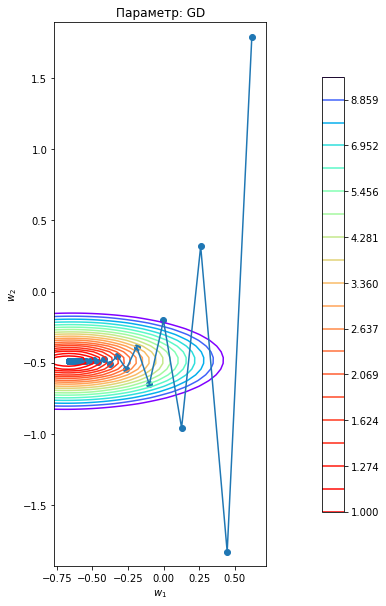

In [35]:
mse_loss = MSELoss()
weight_gd = gradient_descent(w_init, X, y, mse_loss, 0.01, 500)
plot_gd(weight_gd, X, y, mse_loss, "GD")

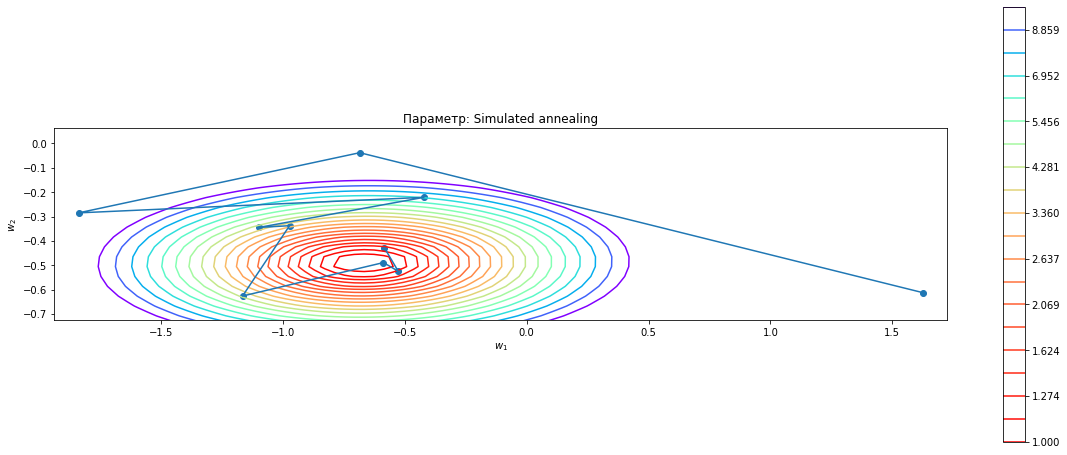

In [36]:
# первый коэфф - степени свободы для распределения стьюдента, второй - random.seed для алгоритма отжига, чтобы смотреть разные траектории)))
simulated_annealing = SimulatedAnnealingLoss(3, 1)
w, annealing_loss = simulated_annealing.calc_grad(X, y, 500)
plot_gd(simulated_annealing.history, X, y, simulated_annealing, "Simulated annealing")

In [37]:
gd_loss = mse_loss.calc_loss(X, y, weight_gd[-1])
print("MSE при градиентном спуске: ", round(gd_loss, 3))
print("MSE при имитации отжига: ", round(annealing_loss, 3))

MSE при градиентном спуске:  0.867
MSE при имитации отжига:  1.22


Траектория имитации отжига тоже постепенно приближается к оптимуму, но находит не прямо его, а где-то близко (что подтверждает мсе)